In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
#from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
!pip install -q kaggle
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS
from os import path

import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
#from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suryamunjal","key":"376b73a1d8c76f470856f9ab7d5318e5"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d akshayaki/fakenews

 48% 17.0M/35.6M [00:01<00:01, 9.97MB/s]
100% 35.6M/35.6M [00:01<00:00, 21.7MB/s]


In [7]:
!unzip fakenews.zip

Archive:  fakenews.zip
  inflating: News.csv                


In [8]:
df=pd.read_csv('News.csv',nrows=2000)

In [9]:
df['combined']=df['title']+ " " + df["text"]

In [10]:
df['Labels']=df['Labels'].map({'Fake': 0, 'True': 1})

In [11]:
df=df[['combined','Labels']]

In [12]:
df.head(2)

,combined,Labels
0,GRAPHIC RIOT VIDEOS EXPOSE THUGS ATTACKING ELD...,0
1,BIG BROTHER: FEDS WANT YOUR DOCTOR TO WARN YOU...,0


In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def preproc(sentance):
#from tqdm import tqdm
# tqdm is for printing the status bar
#for sentance in tqdm(df['combined'].values):
    sentance = re.sub(r"http\S+", "url", sentance)  #removing urls with space
    sentance = BeautifulSoup(sentance, 'lxml').get_text() # removes tags like <br>
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()  # remove words with numbers 
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)  ##remove spacial character:
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    
    return(sentance.strip())







[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:

df['Final_text']=df['combined'].apply(lambda x: preproc(str(x)))


#dropping the original combined column
df.drop(['combined'],inplace=True,axis=1)

In [15]:
df.head(2)

,Labels,Final_text
0,0,graphic riot videos expose thugs attacking eld...
1,0,big brother feds want doctor warn global warmi...


TRAIN TEST SPLIT

In [16]:
# split data into test and train 

X_train, X_test, y_train, y_test = train_test_split(df['Final_text'], df.Labels, test_size = 0.3)

In [17]:
X_train.shape

(1400,)

In [18]:
X_test.shape

(600,)

In [19]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 12.7 MB/s 
     |████████████████████████████████| 163 kB 28.3 MB/s 
     |████████████████████████████████| 6.6 MB 47.9 MB/s 


In [20]:
from transformers import AutoTokenizer,TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-large-uncased')
bert = TFBertModel.from_pretrained('bert-large-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [21]:
tokenizer('hi surya are u having nice day')

{'input_ids': [101, 7632, 7505, 3148, 2024, 1057, 2383, 3835, 2154, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [22]:
print("max len of tweets",max([len(x.split()) for x in df['Final_text']]))
max_length = 512

max len of tweets 2170


In [23]:
X_train = tokenizer(
    text=X_train.tolist(),
    add_special_tokens=True,
    max_length=512,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [24]:
X_train['input_ids'].shape

TensorShape([1400, 512])

In [25]:
X_train['attention_mask'].shape

TensorShape([1400, 512])

In [26]:
X_test = tokenizer(
    text=X_test.tolist(),
    add_special_tokens=True,
    max_length=512,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

BUild the model

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy,BinaryCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy,BinaryAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
 

In [28]:
max_len = 512
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense

input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
# embeddings = dbert_model(input_ids,attention_mask = input_mask)[0]

last_hidden_state = bert(input_ids,attention_mask = input_mask)[0]

cls_token=last_hidden_state[:, 0, :]
                                                          #(0 is the last hidden states,1 means output)
# out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = tf.keras.layers.Dropout(0.1)(cls_token)

out = Dense(32, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
y = Dense(1,activation = 'sigmoid')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = False

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  335141888   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 512,                                           

In [30]:
'''
#optimizer = Adam(
    learning_rate=6e-06, # this learning rate is for bert model , taken from huggingface website 
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)
    '''

# Set loss and metrics
loss = BinaryCrossentropy(from_logits = True)
metric = BinaryAccuracy('accuracy'),
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = loss, 
    metrics = metric)

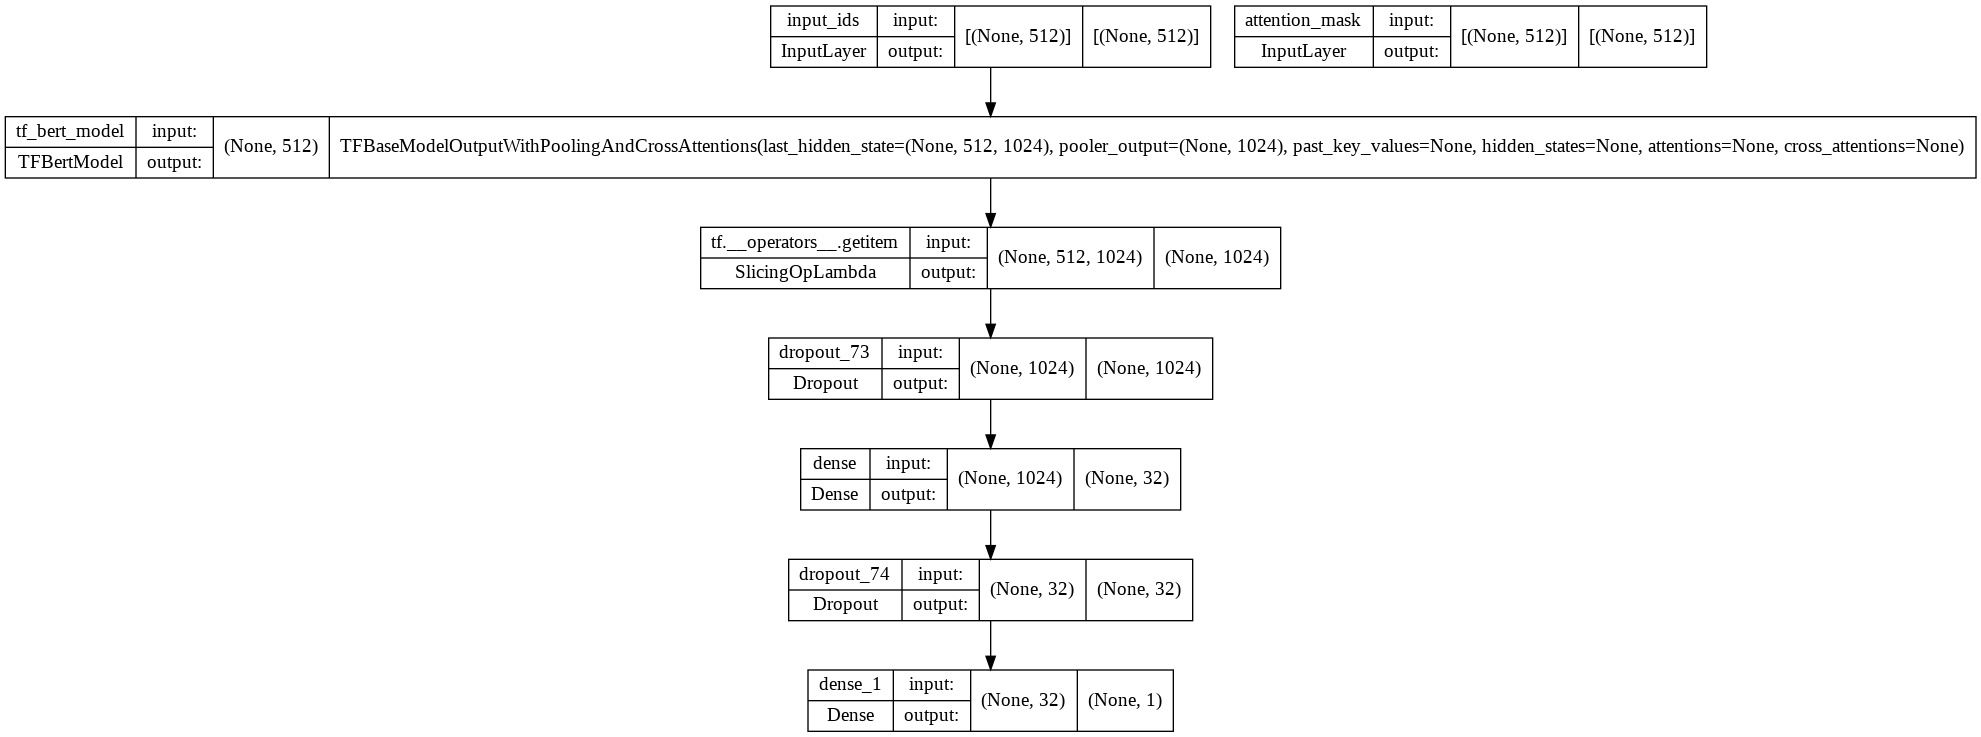

In [31]:
plot_model(model, show_shapes = True)

In [32]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [33]:
y_test.shape

(600, 1)

In [34]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [35]:
history = model.fit(
    x ={'input_ids':X_train['input_ids'],'attention_mask':X_train['attention_mask']} ,
    y = y_train,
    #validation_split = 0.2,
    epochs=5,
    batch_size=128
)

Epoch 1/5
11/11 [==============================] - 230s 18s/step - loss: 0.4209 - accuracy: 0.8436
Epoch 2/5
11/11 [==============================] - 197s 18s/step - loss: 0.2879 - accuracy: 0.9150
Epoch 3/5
11/11 [==============================] - 198s 18s/step - loss: 0.2596 - accuracy: 0.9150
Epoch 4/5
11/11 [==============================] - 197s 18s/step - loss: 0.2361 - accuracy: 0.9150
Epoch 5/5
11/11 [==============================] - 197s 18s/step - loss: 0.2201 - accuracy: 0.9150


In [44]:
history = model.fit(
    x ={'input_ids':X_train['input_ids'],'attention_mask':X_train['attention_mask']} ,
    y = y_train,
    #validation_split = 0.2,
    epochs=5,
    batch_size=128
)

Epoch 1/5
11/11 [==============================] - 197s 18s/step - loss: 0.1978 - accuracy: 0.9150
Epoch 2/5
11/11 [==============================] - 197s 18s/step - loss: 0.1819 - accuracy: 0.9157
Epoch 3/5
11/11 [==============================] - 198s 18s/step - loss: 0.1707 - accuracy: 0.9171
Epoch 4/5
11/11 [==============================] - 198s 18s/step - loss: 0.1567 - accuracy: 0.9200
Epoch 5/5
11/11 [==============================] - 198s 18s/step - loss: 0.1475 - accuracy: 0.9279


In [36]:
predicted = model.predict({'input_ids':X_test['input_ids'],'attention_mask':X_test['attention_mask']})

In [37]:
predicted[0:10]

array([[0.04273619],
       [0.1782984 ],
       [0.10104788],
       [0.04077688],
       [0.01482965],
       [0.04904471],
       [0.03211592],
       [0.13681045],
       [0.05249479],
       [0.05802174]], dtype=float32)

In [38]:
predicted[0]

array([0.04273619], dtype=float32)

In [39]:
 y_pred_thresh = np.where(predicted >= 0.5, 1, 0)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_thresh)
print(accuracy)
                          

0.93


In [41]:
y_pred_thresh[0:20]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [42]:
y_test[0:20]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)